In [ ]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv"

--2025-05-01 03:24:51--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 03:24:51--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
# Instead of importing 'gaussian', import 'norm'
from scipy.stats import norm

In [ ]:
# Configuración de visualización
import seaborn as sns # Import the seaborn library
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
print("Cargando dataset...")
# Change the file path to match the downloaded file's name and location
df = pd.read_csv('clientes_segmentos (1).csv')

Cargando dataset...


In [ ]:
# Preparación de datos
df['fecha_primer_compra'] = pd.to_datetime(df['fecha_primer_compra'])
df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])

In [ ]:
# FASE 1: ANÁLISIS EXPLORATORIO
print("\n--- FASE 1: ANÁLISIS EXPLORATORIO ---")


--- FASE 1: ANÁLISIS EXPLORATORIO ---


<Figure size 1000x600 with 0 Axes>

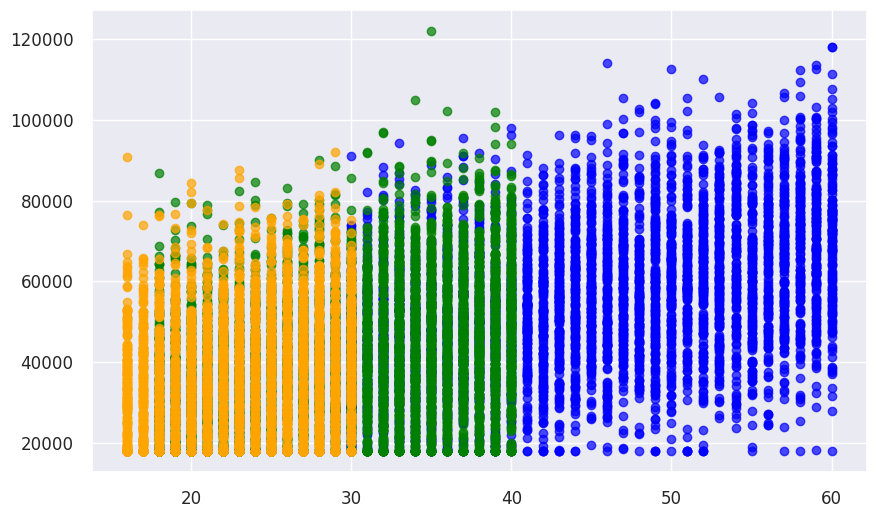

In [ ]:
# P1. Distribución multivariada (edad vs ingresos vs plataforma)
plt.figure()
# P1. Distribución multivariada (edad vs ingresos vs plataforma)
plt.figure()
for plat, color in zip(['Facebook', 'Instagram', 'TikTok'], ['blue', 'green', 'orange']):
    subset = df[df['plataforma'] == plat]
    plt.scatter(subset['edad'], subset['ingresos'], c=color, label=plat, alpha=0.7)

<ipython-input-19-d4579ddefbe2>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


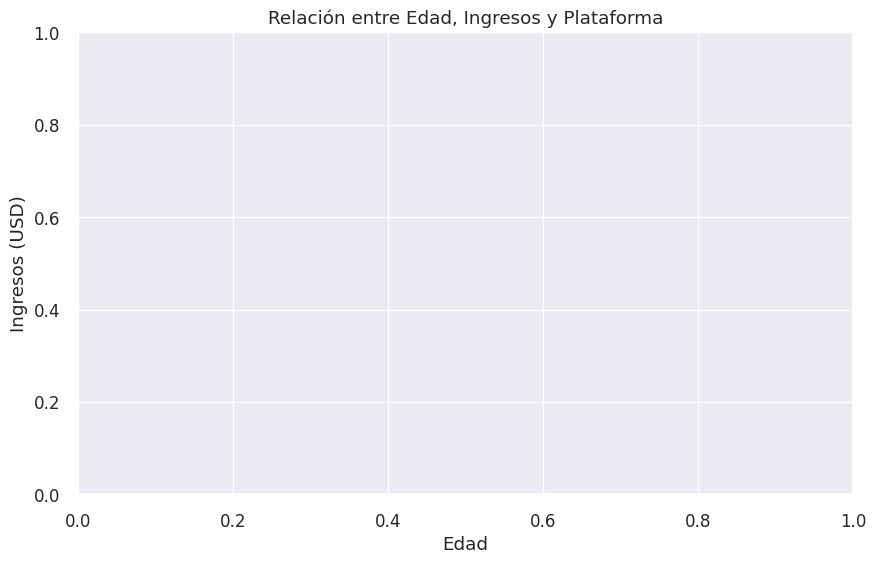

In [ ]:
plt.title('Relación entre Edad, Ingresos y Plataforma')
plt.xlabel('Edad')
plt.ylabel('Ingresos (USD)')
plt.legend()
plt.grid(True)
plt.savefig('data/output/distribucion_multivariada.png')


In [ ]:
# Crear grupos de edad para análisis
df['grupo_edad'] = pd.cut(df['edad'], bins=[15, 25, 35, 45, 60], labels=['16-25', '26-35', '36-45', '46-60'])
ingresos_grupo = df.groupby(['plataforma', 'grupo_edad'])['ingresos'].mean().reset_index()
print("\nIngresos promedio por grupo de edad y plataforma:")
print(ingresos_grupo)


Ingresos promedio por grupo de edad y plataforma:
   plataforma grupo_edad      ingresos
0    Facebook      16-25           NaN
1    Facebook      26-35  43289.504921
2    Facebook      36-45  50830.161992
3    Facebook      46-60  62409.602208
4   Instagram      16-25  33107.307767
5   Instagram      26-35  41573.612964
6   Instagram      36-45  47788.716144
7   Instagram      46-60           NaN
8      TikTok      16-25  32839.384707
9      TikTok      26-35  38721.822908
10     TikTok      36-45           NaN
11     TikTok      46-60           NaN


<ipython-input-20-54fd1f2babdc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingresos_grupo = df.groupby(['plataforma', 'grupo_edad'])['ingresos'].mean().reset_index()


In [ ]:
# P2. Análisis RFM
# P2. Análisis RFM
# Crear dataframe RFM
rfm_df = df[['dias_desde_ultima', 'compras', 'total_gastado', 'recomendaciones']]
rfm_df.columns = ['Recencia', 'Frecuencia', 'Monetario', 'Recomendaciones']
plt.show()

In [ ]:
# Correlaciones
corr_rfm = rfm_df.corr()
print("\nMatriz de correlación RFM:")
print(corr_rfm)


Matriz de correlación RFM:
                 Recencia  Frecuencia  Monetario  Recomendaciones
Recencia         1.000000   -0.003188  -0.003745         0.001027
Frecuencia      -0.003188    1.000000   0.633622         0.009415
Monetario       -0.003745    0.633622   1.000000         0.003284
Recomendaciones  0.001027    0.009415   0.003284         1.000000


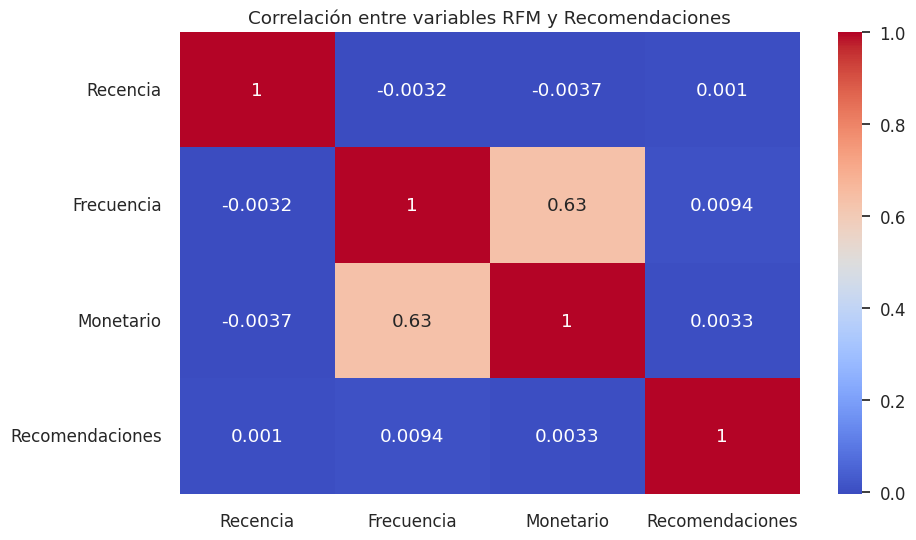

In [ ]:
# Graficar correlaciones
plt.figure()
sns.heatmap(corr_rfm, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables RFM y Recomendaciones')
plt.savefig('data/output/correlacion_rfm.png')

P1:

*   Se puede evidenciar que las personas mayores usan más la plataforma facebook
*  Personas de menos de 40 años estan activas en plataformas como tik tok e intagram

p2: La combinación de las variables Frecuencia y Monetario es una de las más efectivas para predecir el valor futuro de un cliente, esto se debe a que la frecuencia nos indica cuántas veces un cliente realiza las compras, lo que refleja su nivel de fidelidad hacia la marca.

*  La combinación de las variables Frecuencia y Monetario es una de las más efectivas para predecir el valor futuro de un cliente, esto se debe a que la frecuencia nos indica cuántas veces un cliente realiza las compras, lo que refleja su nivel de fidelidad hacia la marca.

*  El valor monetario nos muestra cuánto dinero gasta en esas compras, lo que permite entender el impacto económico que tiene ese cliente para la empresa.



In [ ]:
# FASE 2: MÉTRICAS DE NEGOCIO
print("\n--- FASE 2: MÉTRICAS DE NEGOCIO ---")


--- FASE 2: MÉTRICAS DE NEGOCIO ---


In [ ]:
# P3. CAC por plataforma
plataformas_stats = []
for plat in df['plataforma'].unique():
    df_plat = df[df['plataforma'] == plat]
    activos = len(df_plat[df_plat['dias_desde_ultima'] <= 90])
    pct_activos = (activos / len(df_plat)) * 100
    cac = df_plat['costo_adquisicion'].mean()
    cac_ponderado = cac * (activos / len(df_plat))
    plataformas_stats.append({'Plataforma': plat,
                             'Activos %': pct_activos,
                             'CAC': cac,
                             'CAC Ponderado': cac_ponderado})

In [ ]:
plataformas_df = pd.DataFrame(plataformas_stats)
print("\nCAC por plataforma:")
print(plataformas_df)



CAC por plataforma:
  Plataforma  Activos %        CAC  CAC Ponderado
0   Facebook  47.379535  25.014014      11.851524
1  Instagram  47.495454  17.484212       8.304206
2     TikTok  48.423303  12.460716       6.033890


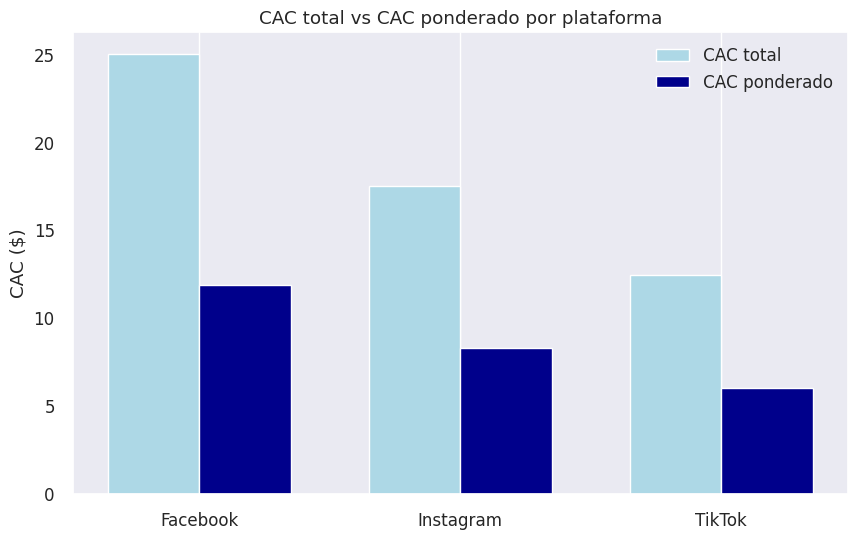

In [ ]:
# Assuming 'plataformas_df' from previous cells contains the data
# If not, replace it with the correct DataFrame
plataformas_df = pd.DataFrame(plataformas_stats)

# Define 'x' as the range of platforms
x = range(len(plataformas_df['Plataforma']))

# Set bar width
bar_width = 0.35

# Plotting
plt.bar(x, plataformas_df['CAC'], width=bar_width, label='CAC total', color='lightblue')
plt.bar([i + bar_width for i in x], plataformas_df['CAC Ponderado'], width=bar_width, label='CAC ponderado', color='darkblue')

# Set x-axis ticks and labels
plt.xticks([i + bar_width / 2 for i in x], plataformas_df['Plataforma'])

plt.ylabel('CAC ($)')
plt.title('CAC total vs CAC ponderado por plataforma')
plt.legend()
plt.grid(axis='y')
plt.show()

In [ ]:
# P4. LTV proyectado
# Calcular frecuencia mensual
fecha_corte = pd.to_datetime('2025-04-01')

In [ ]:
# Calcular meses como cliente usando un método que funcione con fechas
df['meses_cliente'] = df['fecha_primer_compra'].apply(lambda x: (fecha_corte - x).days / 30)
# Evitar división por cero
df['meses_cliente'] = df['meses_cliente'].replace(0, 1)
df['frecuencia_mensual'] = df['compras'] / df['meses_cliente']

In [ ]:
# Tasa de retención según días
def get_retention(dias):
    if dias <= 90:
        return 0.8
    elif dias <= 180:
        return 0.6
    else:
        return 0.3

In [ ]:

df['tasa_retencion'] = df['dias_desde_ultima'].apply(get_retention)

In [ ]:
# Calcular LTV
df['ltv'] = df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_retencion']

In [ ]:
print("\n Estadísticas de LTV:")
print(df['ltv'].describe())


 graficar Estadísticas de LTV:
count    15000.000000
mean        51.284868
std         53.128523
min          2.090997
25%         18.064067
50%         34.150478
75%         65.124067
max        615.529412
Name: ltv, dtype: float64


In [ ]:
# P5. Margen neto
df['margen'] = df['ltv'] - df['costo_adquisicion']

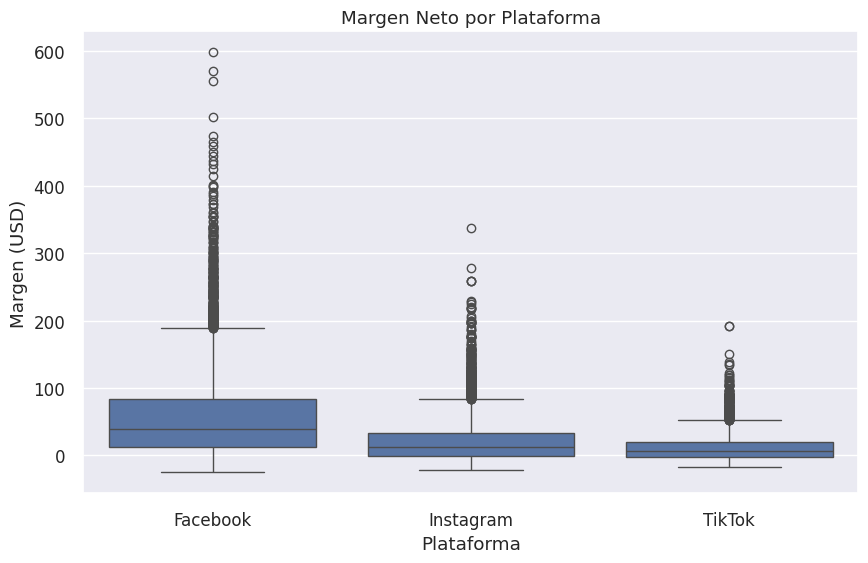

In [ ]:
# Gráfico de margen por plataforma
plt.figure()
sns.boxplot(x='plataforma', y='margen', data=df)
plt.title('Margen Neto por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Margen (USD)')
plt.savefig('data/output/margen_por_plataforma.png')

Segun la grafica, la plataforma que ofrece mayor oportunidad de rentabilidad incremental es Facebook

In [ ]:
# Margen promedio por plataforma
margen_plat = df.groupby('plataforma')['margen'].mean()
print("\nMargen promedio por plataforma:")
print(margen_plat)
mejor_plat = margen_plat.idxmax()


Margen promedio por plataforma:
plataforma
Facebook     59.600939
Instagram    21.450680
TikTok       12.391383
Name: margen, dtype: float64


In [ ]:
# FASE 3: SEGMENTACIÓN Y MODELADO
print("\n--- FASE 3: SEGMENTACIÓN Y MODELADO ---")


--- FASE 3: SEGMENTACIÓN Y MODELADO ---


In [ ]:
# P6/P7. Segmentación (k=3 según enunciado)
# Preparar datos para clustering
X = df[['dias_desde_ultima', 'compras', 'total_gastado', 'recomendaciones']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Nombrar clusters
nombres_clusters = {
    0: "Fieles Frecuentes",
    1: "Ocasionales",
    2: "Grandes Gastadores"
}


In [ ]:
df['nombre_cluster'] = df['cluster'].map(nombres_clusters)

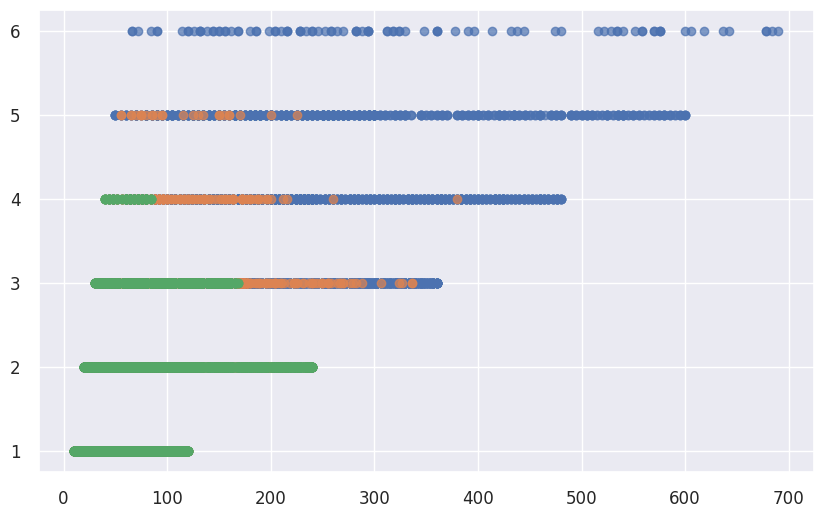

In [ ]:
# Visualizar clusters
plt.figure()
for cluster in range(3):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['total_gastado'], cluster_data['compras'],
                label=nombres_clusters[cluster], alpha=0.7)

<ipython-input-59-d8f23a8fbeb4>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


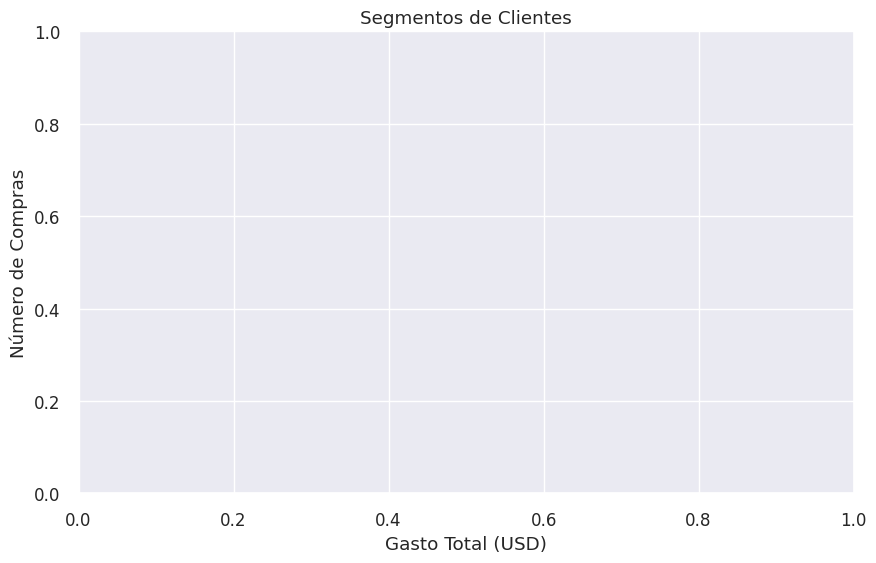

In [ ]:
plt.title('Segmentos de Clientes')
plt.xlabel('Gasto Total (USD)')
plt.ylabel('Número de Compras')
plt.legend()
plt.savefig('data/output/segmentos_clientes.png')

In [ ]:
# Perfiles de clusters
perfiles = df.groupby('nombre_cluster').agg({
    'edad': 'mean',
    'ingresos': 'mean',
    'compras': 'mean',
    'promedio_ticket': 'mean',
    'total_gastado': 'mean',
    'dias_desde_ultima': 'mean',
    'recomendaciones': 'mean',
    'ltv': 'mean',
    'costo_adquisicion': 'mean',
    'margen': 'mean',
    'id_cliente': 'count'
}).rename(columns={'id_cliente': 'cantidad'})

In [ ]:
print("\nPerfiles de clusters:")
print(perfiles.round(2))


Perfiles de clusters:
                     edad  ingresos  compras  promedio_ticket  total_gastado  \
nombre_cluster                                                                 
Fieles Frecuentes   37.00  47327.67     4.04            63.60         246.21   
Grandes Gastadores  31.91  42858.89     1.83            44.84          77.12   
Ocasionales         31.92  42961.36     1.94            45.01          82.65   

                    dias_desde_ultima  recomendaciones     ltv  \
nombre_cluster                                                   
Fieles Frecuentes               92.82              0.4  110.30   
Grandes Gastadores              95.15              0.0   34.48   
Ocasionales                     94.72              1.3   36.66   

                    costo_adquisicion  margen  cantidad  
nombre_cluster                                           
Fieles Frecuentes               21.05   89.25      3185  
Grandes Gastadores              18.28   16.20      6961  
Ocasionales  

In [ ]:
# P8. Predicción de High Margin
percentil_75 = np.percentile(df['margen'], 75)
df['alto_margen'] = (df['margen'] >= percentil_75).astype(int)

In [ ]:
# % de alto margen por cluster
alto_margen_cluster = df.groupby('nombre_cluster')['alto_margen'].mean() * 100
print("\n% de alto margen por cluster:")
print(alto_margen_cluster)


% de alto margen por cluster:
nombre_cluster
Fieles Frecuentes     71.397174
Grandes Gastadores    11.664991
Ocasionales           13.679440
Name: alto_margen, dtype: float64


In [ ]:
# Modelo predictivo simple
X_model = df[['dias_desde_ultima', 'compras', 'total_gastado', 'promedio_ticket', 'recomendaciones']]
y_model = df['alto_margen']

In [72]:
# FASE 4: DECISIÓN ESTRATÉGICA
print("\n--- FASE 4: DECISIÓN ESTRATÉGICA ---")


--- FASE 4: DECISIÓN ESTRATÉGICA ---


In [73]:
# P9. Asignación de presupuesto ($10,000)
presupuesto = 10000

In [74]:
# Estadísticas por cluster
cluster_stats = df.groupby('nombre_cluster').agg({
    'margen': 'mean',
    'costo_adquisicion': 'mean'
}).reset_index()

In [75]:
# Escenario 1: Todo en un solo cluster
mejor_cluster = cluster_stats.iloc[cluster_stats['margen'].argmax()]
clientes_e1 = presupuesto / mejor_cluster['costo_adquisicion']
roi_e1 = (clientes_e1 * mejor_cluster['margen']) / presupuesto

In [76]:
# Escenario 2: Dividir en dos clusters (60/40)
cluster_stats_sorted = cluster_stats.sort_values('margen', ascending=False)
top2_clusters = cluster_stats_sorted.iloc[:2]
presupuesto_e2_1 = presupuesto * 0.6
presupuesto_e2_2 = presupuesto * 0.4

In [77]:
clientes_e2_1 = presupuesto_e2_1 / top2_clusters.iloc[0]['costo_adquisicion']
clientes_e2_2 = presupuesto_e2_2 / top2_clusters.iloc[1]['costo_adquisicion']
roi_e2 = ((clientes_e2_1 * top2_clusters.iloc[0]['margen']) +
          (clientes_e2_2 * top2_clusters.iloc[1]['margen'])) / presupuesto

In [78]:
# Escenario 3: Proporcional al margen
total_margen = (cluster_stats['margen'] *
                df.groupby('nombre_cluster')['id_cliente'].count().values).sum()


In [79]:
roi_e3 = 0
clientes_e3 = 0
for i, row in cluster_stats.iterrows():
    cluster_size = len(df[df['nombre_cluster'] == row['nombre_cluster']])
    proporcion = (row['margen'] * cluster_size) / total_margen
    presupuesto_cluster = presupuesto * proporcion
    nuevos_clientes = presupuesto_cluster / row['costo_adquisicion']
    clientes_e3 += nuevos_clientes
    roi_e3 += nuevos_clientes * row['margen']

In [80]:
# Resultados
escenarios = {
    1: roi_e1,
    2: roi_e2,
    3: roi_e3
}

In [81]:
mejor_escenario = max(escenarios.items(), key=lambda x: x[1])[0]

In [82]:
print("\nResultados de escenarios:")
print(f"Escenario 1: ROI = {roi_e1:.2f}")
print(f"Escenario 2: ROI = {roi_e2:.2f}")
print(f"Escenario 3: ROI = {roi_e3:.2f}")
print(f"Mejor escenario: {mejor_escenario}")


Resultados de escenarios:
Escenario 1: ROI = 4.24
Escenario 2: ROI = 2.95
Escenario 3: ROI = 28684.16
Mejor escenario: 3


In [83]:
# P10. Programa de referidos

In [84]:
# Top 10% advocates
top10_percentil = np.percentile(df['recomendaciones'], 90)
top_advocates = df[df['recomendaciones'] >= top10_percentil]
print(f"\nTop advocates (>= {top10_percentil} recomendaciones): {len(top_advocates)}")


Top advocates (>= 1.0 recomendaciones): 5950


In [85]:
# Valor futuro de referidos
valor_futuro = {}
for cluster in nombres_clusters.values():
    advocates_cluster = top_advocates[top_advocates['nombre_cluster'] == cluster]
    margen_prom = df[df['nombre_cluster'] == cluster]['margen'].mean()
    nuevos = len(advocates_cluster) * 2  # 2 nuevos por advocate
    valor = nuevos * margen_prom
    valor_futuro[cluster] = valor
    print(f"Valor futuro en {cluster}: ${valor:.2f}")

Valor futuro en Fieles Frecuentes: $195628.26
Valor futuro en Ocasionales: $179174.17
Valor futuro en Grandes Gastadores: $0.00


In [88]:
# FASE 5: REFLEXIÓN CRÍTICA



--- FASE 5: REFLEXIÓN CRÍTICA ---




Posibles sesgos:
1. Sesgo de supervivencia - solo vemos clientes activos, no los que abandonaron
2. Sesgo temporal - los datos son de un punto específico en el tiempo
3. Sesgo de selección - la captación por plataforma puede atraer perfiles específicos

Mejoras metodológicas:
1. Implementar pruebas A/B para validar estrategias por segmento
2. Incorporar análisis de cohortes para evaluar retención a largo plazo